
<img src="BIGDIVE_logo.png" width="300">
<br>

**designed for**

<img src="Intesa.png">



---

# NETWORK SCIENCE - practice

### Claudio Borile

<img src="aizoon.png" width="150" align="center">


# Table of contents

* [1. Introduction](#1.-Introduction)
    * [1.1 Modules](#1.1-Modules)
    * [1.2 Networkx primer](#1.2-Networkx-primer)
        * [Nodes and edges](#Nodes-and-edges)
        * [Adjacency matrix](#Adjacency-matrix)
        * [I/O](#I/O)
        * [Visualization](#Visualization)
* [2. Airports network](#2.-Airports-network)
    * [2.1. Network construction](#2.1.-Network-construction)
    * [2.2. Connected components](#2.2.-Connected-components)
    * [2.3. Network description](#2.3.-Network-description)
    * [2.4. Network robustness](#2.4.-Network-robustness)
    * [2.5. Paths](#2.5.-Paths)
    * [2.6. Anomaly](#2.6.-Anomaly)
* [3. A simple reccomender system](#3.-A-simple-reccomender-system)
    * [3.1. Movielens dataset](#3.1.-Movielens-dataset)
* [4. Community detection](#4.-Community-detection)
    * [Girvan - Newman algorithm](#Girvan-Newman-algorithm)
    * [Modularity](#Modularity)

# 1. Introduction

You have learned about the basic theory behind network analysis and graph theory in the previous class, now it's time for a hands-on on those concepts to see how they can be applied in your daily practice using Python.

## 1.1 Modules

In this notebook we will use:
- networkx
- pandas/numpy/scipy
- matplotlib
- **optional**: seaborn, plotly

first of all, import the modules

In [1]:
import networkx as nx

import pandas as pd

%pylab inline
#import numpy as np

import seaborn as sb

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go

Populating the interactive namespace from numpy and matplotlib


## 1.2 Networkx primer

**Networkx** is a Python package that allows to easily create and manipulate graphs, it contains pretty much all the standard graph models, methods and algorithms that we will use today (and much more!).

The complete documentation can be found <a href="https://networkx.github.io/documentation/stable/index.html"> here</a>.

First of all, the main object is obviously the **graph**. NX supports undirected, directed, multi, etc. graph types

In [2]:
G = nx.Graph()
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 0
Number of edges: 0



### Nodes and edges

For now G is an empty container. The structure of the graph will be determined once we add **nodes** and **edges** to our graph G.

In [3]:
G.add_node(1)
G.add_node('a') #the type of the node can be whatever...

G.add_edge('a', 1)

In [4]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 2
Number of edges: 1
Average degree:   1.0000


nodes and edges can be endowed with **attributes**,

(**N.B.** if I create an edge referring to non-existing nodes, they are automatically created)

In [5]:
G.add_edge(2, 3, weight=5)
G.add_node('isolated', p = "it is isolated")

In [6]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 5
Number of edges: 2
Average degree:   0.8000


In [8]:
G.has_edge(3,2)

True

I can get all nodes or edges with or without attributes in various ways

In [9]:
print('Only nodes\n', G.nodes())
print('Nodes with all attributes (dict type)\n', G.nodes(data=True))
print('Single attribute (tuple type)\n', G.nodes(data='p'))

Only nodes
 [1, 'a', 2, 3, 'isolated']
Nodes with all attributes (dict type)
 [(1, {}), ('a', {}), (2, {}), (3, {}), ('isolated', {'p': 'it is isolated'})]
Single attribute (tuple type)
 [(1, None), ('a', None), (2, None), (3, None), ('isolated', 'it is isolated')]


In [10]:
print('Only edges\n', G.edges())
print('Edges with all attributes (dict type)\n', G.edges(data=True))
print('Single attribute (tuple type)\n', G.edges(data='weight'))

Only edges
 [(1, 'a'), (2, 3)]
Edges with all attributes (dict type)
 [(1, 'a', {}), (2, 3, {'weight': 5})]
Single attribute (tuple type)
 [(1, 'a', None), (2, 3, 5)]


edges and nodes can be added in bunches

In [11]:
edges_list = [(10, 11), (12, 13), (14, 15), (16, 17, {'weight': 124})]

In [12]:
G.add_edges_from(edges_list)
G.edges()

EdgeView([(1, 'a'), (2, 3), (10, 11), (12, 13), (14, 15), (16, 17)])

### Adjacency matrix

The adjacency matrix $A$ of a graph $G=(V, E)$ is defined as the $N\times N$ matrix (where N is the number of nodes of G) whose entries are given by

$A_{ij} = w_{ij}>0$ if $(i, j)\in E$

$A_{ij} = 0$ otherwise

if the graph is **unweighted** $w_{ij} \in \{0, 1\}$, if the graph is **undirected** $A_{ij} = A_{ji}\ \forall i, j \in V$

it is a way of encoding the graph structure

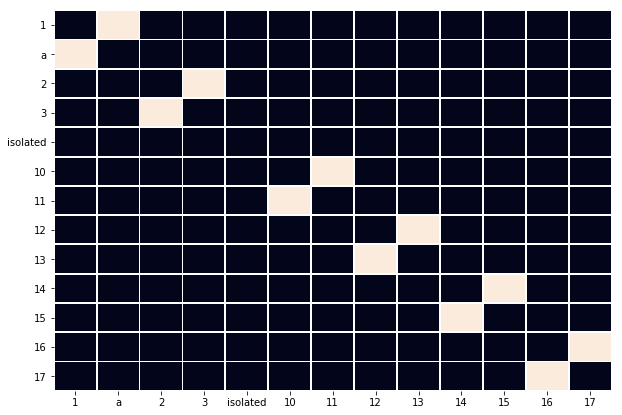

In [13]:
figsize(10, 7)
ax = sb.heatmap(nx.to_pandas_adjacency(G, weight=None), linewidths=.9, cbar=False)

### I/O

Of course, usually we don't want to create a network by inserting manually all nodes and edges, and a way to read and/or write networks to file is in order

NX offers many different formats, the most common and basic being the edgelist and the adjacency matrix formats

Other formats (.gml, .gexf, ...) might be useful for later use in web application of visualization softwares (see later)

In [31]:
G = nx.erdos_renyi_graph(100, 0.1, directed=True)

In [32]:
print(nx.info(G))

Name: 
Type: DiGraph
Number of nodes: 100
Number of edges: 941
Average in degree:   9.4100
Average out degree:   9.4100


In [33]:
nx.write_edgelist(G, './ER_graph.edgelist')

In [34]:
G = nx.read_edgelist('./ER_graph.edgelist')

In [35]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 100
Number of edges: 902
Average degree:  18.0400


**Exercise 0:** Here we can se a common problem when naively importing a file, can you see what the problem is?

Generato diretto ma quando viene reimportato è indiretto

In [39]:
G = nx.read_edgelist('./ER_graph.edgelist', create_using=nx.DiGraph())

In [40]:
print(nx.info(G))

Name: 
Type: DiGraph
Number of nodes: 100
Number of edges: 941
Average in degree:   9.4100
Average out degree:   9.4100


La matrice di adiacenza ora non è più simmetrica

In [41]:
a = nx.adjacency_matrix(G)

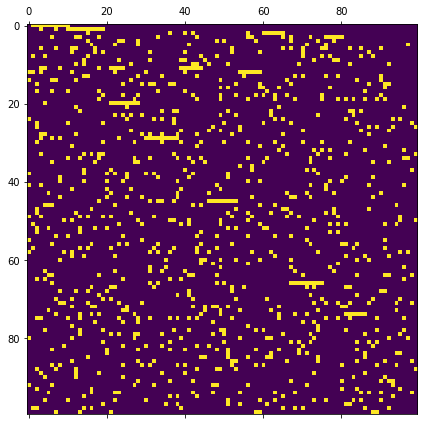

In [42]:
plt.matshow(a.todense())

In [43]:
numpy.allclose(a.todense(),a.T.todense())

False

**Exercise 1:** NX provides a series of built-in methods for generating graphs (<a href="https://networkx.github.io/documentation/networkx-1.10/reference/generators.html">here</a> the documentation). Generate, for N=1000 number of nodes, a random regular graph, Erdos-Renyi, watts-strogatz and a scale free graph.

Describe the obtained graphs through classic graphs' metrics, what are the main differences? (tune the parameters of the generators in order to have comparable graphs)

In [51]:
ER = nx.gnp_random_graph(1000,0.1)  
print(nx.info(ER))

Name: 
Type: Graph
Number of nodes: 1000
Number of edges: 50430
Average degree: 100.8600


In [52]:
WS = nx.watts_strogatz_graph(1000,4,0.1)
print(nx.info(WS))

Name: 
Type: Graph
Number of nodes: 1000
Number of edges: 2000
Average degree:   4.0000


In [54]:
SF = nx.scale_free_graph(1000)
print(nx.info(SF))

Name: 
Type: MultiDiGraph
Number of nodes: 1000
Number of edges: 2154
Average in degree:   2.1540
Average out degree:   2.1540


### Visualization

NX provides a set of methods for drawing a network, where almost all components of the network can be personalized. One of the most important component when visualizing a network is the layout algorithm.

<a href="https://en.wikipedia.org/wiki/Graph_drawing">Link to the wikipedia page about graph drawing</a>

**N.B.** That of _graph drawing_ is almost an art (<a href="http://www.theartofnetworks.com/">really!</a>), so it is difficult to effectively visualize a network, especially when large.

Most layout algorithms are dynamical systems where the "particles" (nodes) are attracted end repelled through electromagnetic and gravitational forces, and the intensity of these forces is given by attributes like degree and edges' weights. Because of this the convergence (if existing) of these algorithms might be very slow!

In [57]:
G =nx.barabasi_albert_graph(50, 3)

In [58]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 50
Number of edges: 141
Average degree:   5.6400


In [59]:
weights = {n: np.random.randint(100) for n in G.edges()}

In [60]:
nx.set_edge_attributes(G, weights, 'weight')

In [61]:
degrees_dict = G.degree()
strength_dict = G.degree(weight='weight')

In [62]:
k = pd.Series(dict(G.degree()))

In [63]:
n_list = G.nodes()
e_list = [(i, j) for i, j in G.edges()]
w_list = [w['weight']/10. for i, j, w in G.edges(data=True)]
s_list = [degrees_dict[s]*1000. for s in n_list]
#s_list = [strength_dict[s]/500. for s in n_list]

C:\Users\U413635\AppData\Local\Continuum\anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning:

isinstance(..., numbers.Number)



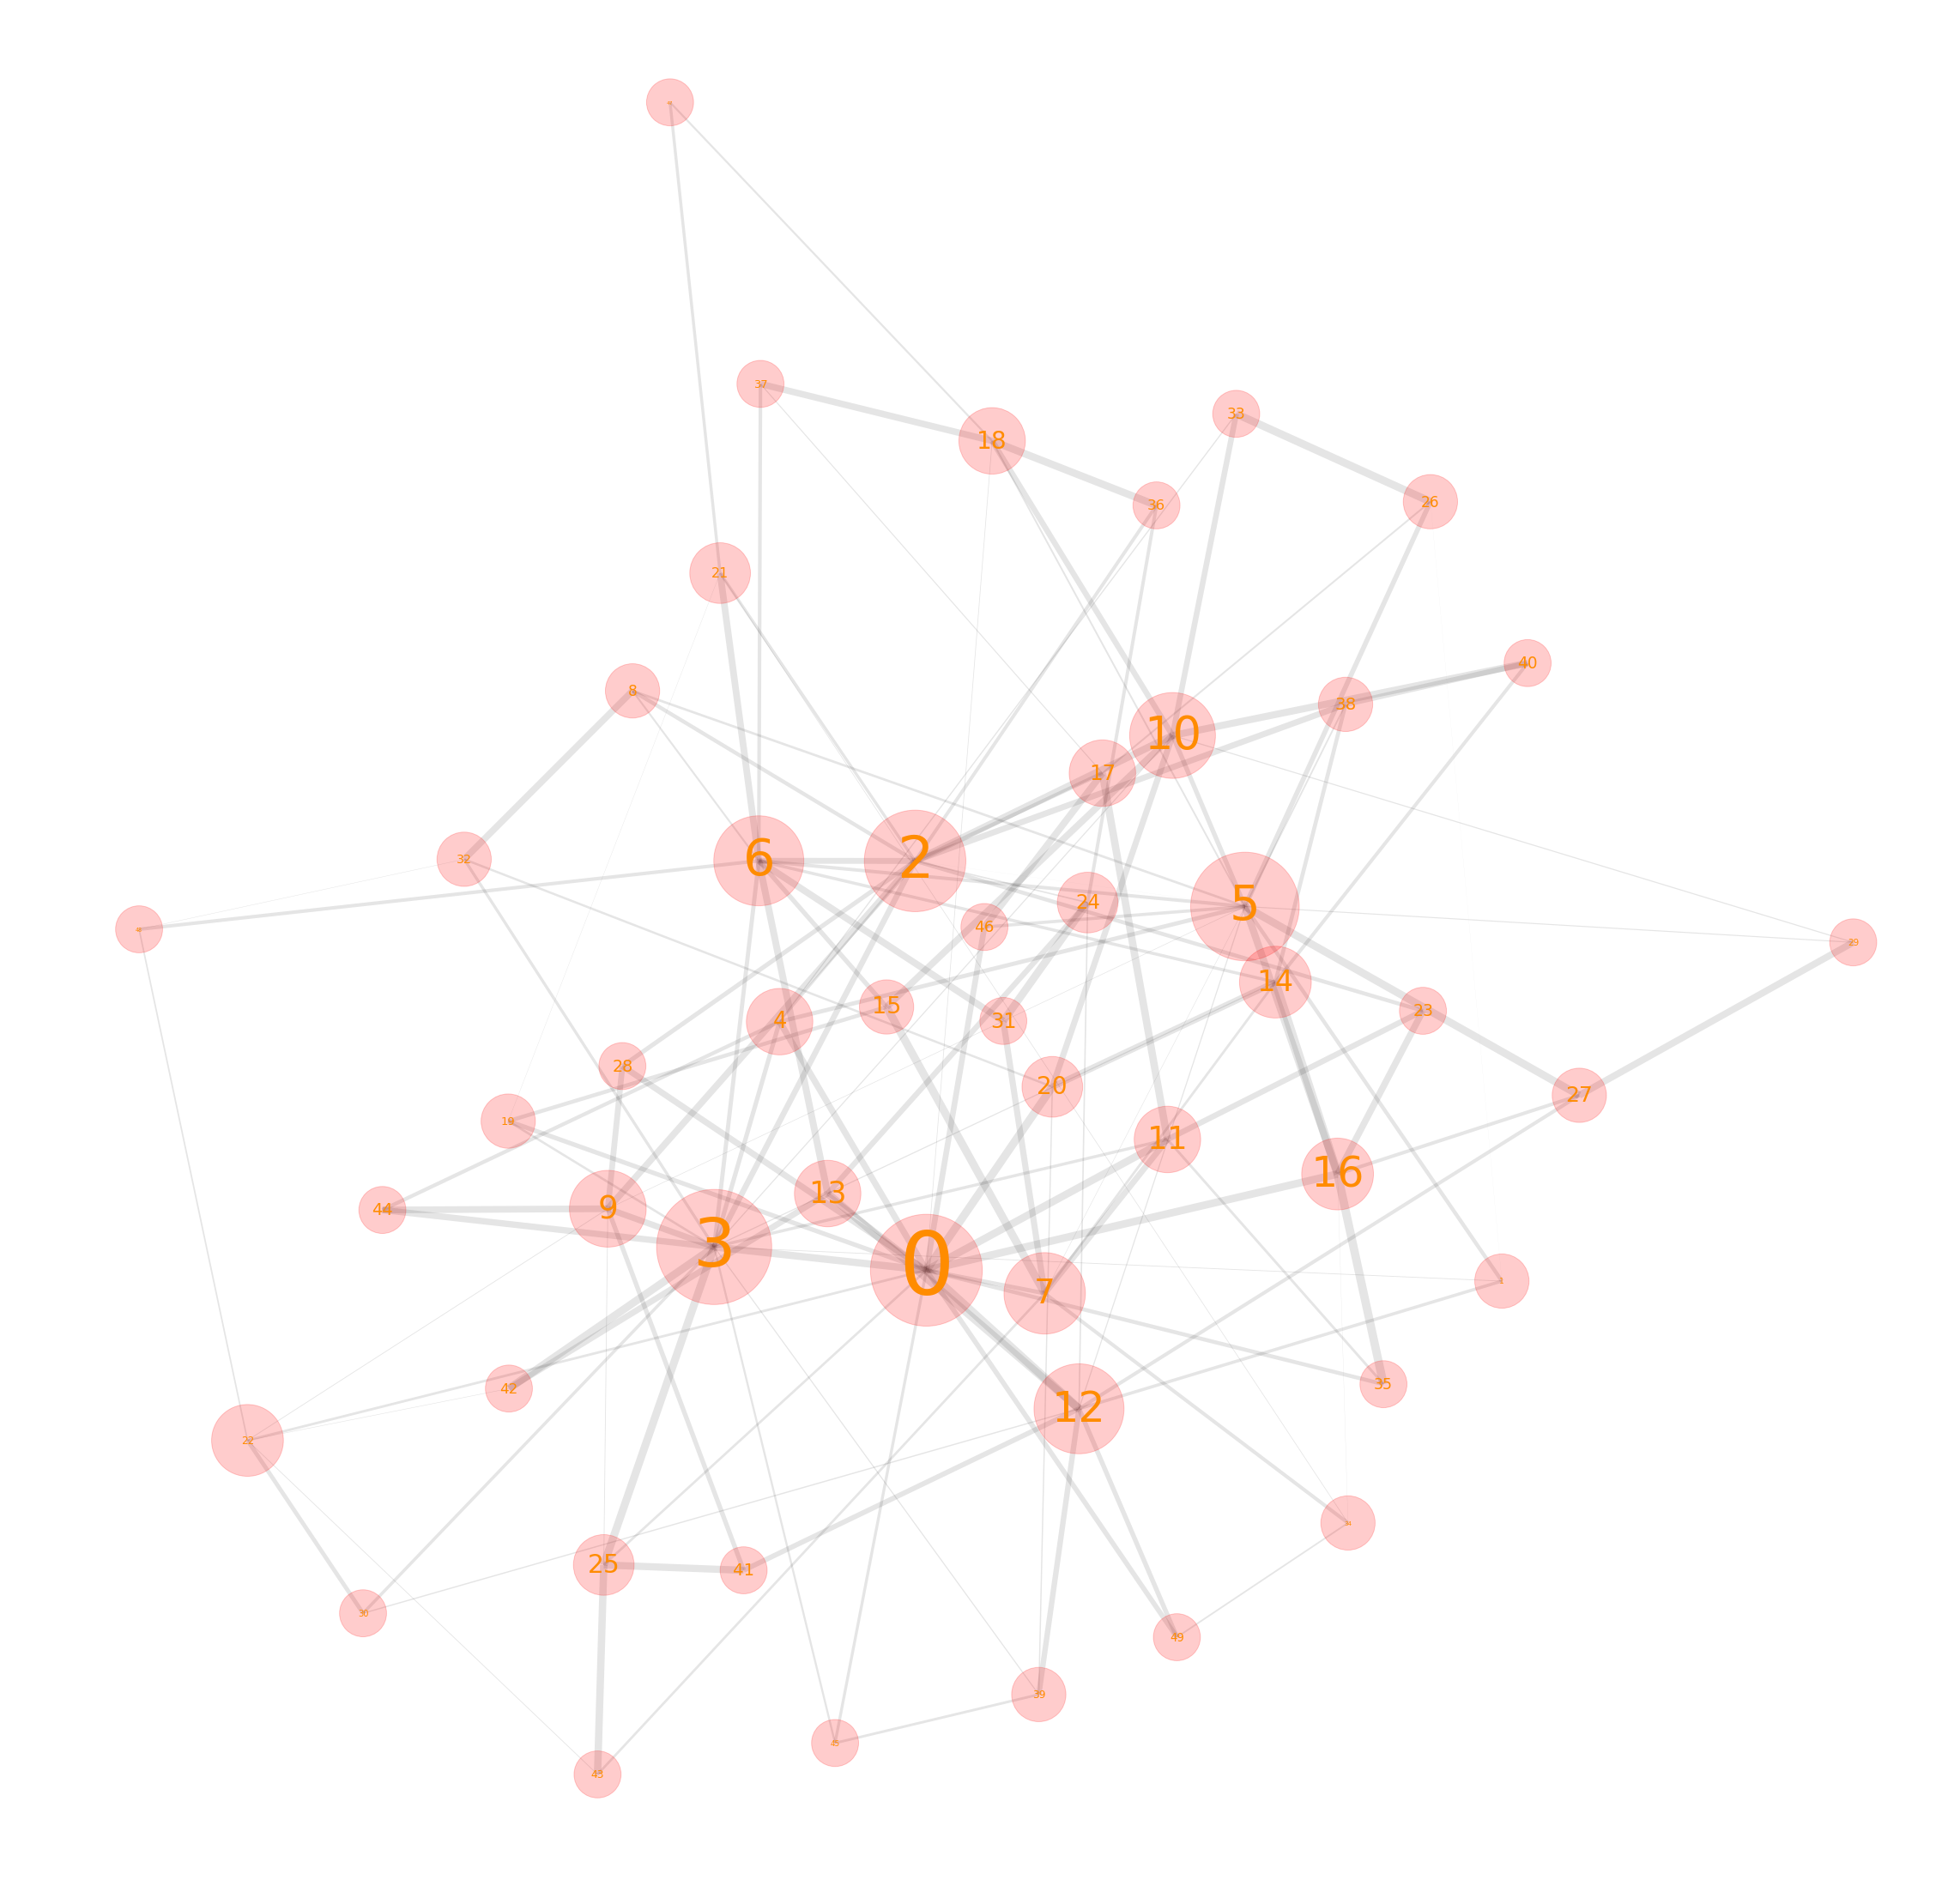

In [64]:
plt.figure(figsize=(40, 40))

#compute the nodes' position based on weights
pos = nx.spring_layout(G, k=10., iterations=5000, weight='weight')

#draw network edges
nx.draw_networkx_edges(G, pos, alpha=0.1, edgelist=e_list, width=w_list)

#draw network nodes
nx.draw_networkx_nodes(G, pos = pos, alpha=0.2, node_size=s_list, nodes_color = 'orange', nodelist=n_list)

# Print node labels separately
for n in n_list:
    plt.annotate(n,
        xy = pos[n],
        textcoords = 'offset points',
        horizontalalignment = 'center',
        verticalalignment = 'center',
        xytext = [0, 0],
        #fontsize = k[n],
        fontsize = 1.*strength_dict[n]/10.,         
        color = 'darkorange'
    )
plt.axis('off')
#plt.savefig("network.png")
plt.show()

### <a href="https://gephi.org/">Gephi</a> demo

**N.B.** Unlike machine learning and pattern recognition, where the goal is clearly defined, network analysis provides only a mathematical framework -a modelization of the problem, in the form of individual entities and relations between them- and a set of tools, but you have to figure out what kind of information you want to extract from the model. 

# 2. Airports network

The file **routes.dat** contains information about the global flights' network. Each row represents an airline flight, with source and destination. The network structure of this data is evident. 

## 2.1. Network construction

**Exercise 2:** load the file routes.dat in a pandas dataframe, do some preliminary analysis on the data structure and build the corresponding (directed, weighted) graph where 
- the nodes are given by the airports
- a link is drawn from A to B if there is one or more airline doing the route A->B
- the weight of the link is given by the total number of flights from A to B

In [65]:
import pandas as pd

In [68]:
routes = pd.read_csv('routes.dat',sep=',')

In [69]:
routes.head()

,2B,410,AER,2965,KZN,2990,Unnamed: 6,0,CR2
0,2B,410,ASF,2966,KZN,2990,NaN,0,CR2
1,2B,410,ASF,2966,MRV,2962,NaN,0,CR2
2,2B,410,CEK,2968,KZN,2990,NaN,0,CR2
3,2B,410,CEK,2968,OVB,4078,NaN,0,CR2
4,2B,410,DME,4029,KZN,2990,NaN,0,CR2


In [ ]:
net = routes.groupby(['So'])

## 2.2. Connected components

Is this specific network connected?

In [ ]:
components = sorted([len(c) for c in nx.strongly_connected_components(G_flights)], reverse=True)
print ('Connected components:', components)

The graph is not connected, and it is clearly showing a giant connected component (extensive in the size $N$ of the graph) and many components made of few nodes. This is typical of many real-world networks.

The second largest components is the network of internal flights in new caledonia

In [ ]:
sorted([c for c in nx.strongly_connected_components(G_flights)], reverse=True, key=len)[1]

From now on let's take only the largest connected components

**Exercise 3:** Redefine G_flights as the network given by keeping only the largest connected component of the original network.

## 2.3. Network description

**Exercise 4:** What are the basic metrics (centralities, main distributions, ...) of this network?

**Exercise 5:** Build and visualize the graph's giant component adjacency matrix

# 2.4. Network robustness

The **giant component** is a connected component of a given random graph that contains a constant fraction of the entire graph's vertices.

For random removal of nodes, the giant component of a binomial random graphs breaks at the critical point $f_c = 1 - \frac{1}{\langle k \rangle}$ (see Barabasi). Scale-free networks, due to the presence of hubs, are more robust.   

Suppose that a computer virus is crashing the communication system of one random airport at the time, what is the expected number of nodes that have fail so that the network breaks apart?

In [ ]:
g = G_flights.copy()
l = []
i = 0
nodes_list = list(g.nodes())
while len(nodes_list) > 0:
    if i%10 == 0:
        print (i, end=' ')
        cc = len(sorted([c for c in nx.strongly_connected_components(g)], reverse=True, key=len)[0])
        p = 1.*cc/len(G_flights.nodes())
        l.append((i, p))
    i+=1
    rnd_node = nodes_list[random.randint(len(nodes_list))]
    g.remove_node(rnd_node)
    nodes_list = list(g.nodes())

In [ ]:
fail = pd.Series(l).apply(pd.Series).set_index(0)
fail.columns = ['random failure']
fail.plot(figsize=(15, 10), grid=True, style='o-');

**Exercise 6**: Now the virus is getting smarter, and instead of attacking a random node it gets first the hubs. How many nodes does he have to attack now?

**Exercise 7:** What would happen in a purely random network (Erdos-Renyi)?

## 2.5. Paths

**Exercise 8:** Show all the shortest paths for getting from Turin (TRN) to Linz (LNZ)

**Exercise 9:** Find and plot all airports that can be reached with a distance of max 2 hops from Turin and Milan. How are they different?

## 2.6 Anomaly

As you know, the **betweennes** centrality of a node measures how much that node act as a bridge connecting all the other nodes, in terms of shortest paths. 

$\displaystyle\mathcal{B} = \sum_{s\neq v\neq t}\frac{\sigma(s, t | v)}{\sigma(st)}$

Networkx provides a built-in version of the algorithm for computing the beweenness (like very much _all_ standard algorithms on graphs).

If we compute the betweenness for the flights network, we can see that something's unexpected! 

**Exercise 10:** Compute the betweenness centrality for all airports and answer:
- which airport is the most central?
- What's _quantitatively_ strange? 


# 3. A simple reccomender system

Consider the case where you have data about a group of users and a series of items they bought/interacted with (a store, media consumption, etc.). We would like to be able to reccomend new products to users based on what similar users liked.

We can intuitively associate a bipartite network* user->item to our system and exploit this data structure to build the simplest reccomender engine.

*a **bipartite network** is a network $G=(V, E)$ where $V = A\cup B,\ A\cap B = \emptyset$ and $(i, j) \in E \Rightarrow\ i\in U, j\in V\setminus U,\ U=A, B$

### Collaborative filtering

The simplest approach to a reccomender system is that of **collaborative filtering**.

<center><img src="cf.png" width="500"></center>
    
    image taken from https://d4datascience.wordpress.com/2016/07/22/recommender-systems-101/ 


The idea is to associate a similarity score to each of the users or items and reccomend a specific user items based on what the most similar users bought.

For a (undirected) bipartite graph the adjacency matrix is in the form 

$A = \begin{bmatrix}
0 & B \\
B^{T} & 0 
\end{bmatrix}$

where $B$ is a $N\times M$ matrix, with $N$ number of nodes in $A$ (users) and $M$ number of nodes in $B$ (items). We can work on the matrix $B$

In [ ]:
B = np.matrix([[1, 1, 0, 0], [1, 1, 1, 0], [0, 0, 1, 1]])

In [ ]:
print(B)

In [ ]:
norm = np.linalg.norm(B, axis=1)
S = B.dot(B.T)/np.outer(norm, norm)

In [ ]:
S1 = S-np.identity(S.shape[0])

In [ ]:
B[argmax(S1[0, :])]

# 3.1. Movielens dataset

We consider now a dataset of movie ratings from online users. We have two files in the ml-latest-small directory:
- ratings.csv
- movies.csv

**Exercise 11:** Describe the dataset, preprocess it in order to have a single dataframe containing the following informations: userId, movieId, rating, title. Try to apply the same process seen above in order to build a reccomender system for an online movie service.

We can use this similarity matrix to try to predict the missing ratings (ratings to movies that users have not seen) 

In [ ]:
R = S.dot(B)/np.matrix(np.linalg.norm(S, ord=1, axis=1)).T

In [ ]:
reccomandation_df = pd.DataFrame(R, index=user_item_df.index, columns=columns_titles)

In [ ]:
reccomandation_df.iloc[:5, :5]

In [ ]:
from sklearn.metrics import mean_squared_error

def get_mse(pred, actual):
    # Ignore nonzero terms.
    pred = pred[actual.nonzero()].flatten()
    actual = actual[actual.nonzero()].flatten()
    return mean_squared_error(pred, actual)

In [ ]:
get_mse(R, B)

This is a baseline error for the simplest, model independent, reccomender system. More refined engines must score better.

# 4. Community detection

Community detection is an _ill defined_ problem. We are trying to assign to each node a label without knowing the ground truth (yes, it's a clustering). Furthermore usually we don't know how many communities we are looking for.
That is why there are so many different CD algorithms, with a great variety of mathematical and logical approaches to tackle the problem, and why it's so crucial to assess the best option for the specific case under scrutiny.

We must be careful when running community detection algorithms!

General reference: <a href="http://networksciencebook.com/chapter/9"> Barabasi - Network science - chapter 9 </a>

## Girvan Newman algorithm

Original article: http://www.pnas.org/content/99/12/7821.full.pdf

**Exercise 12:** Implement the Girvan-Newman algorithm for the flights operated by Alitalia (airline = AZ)

**Exercise 13:** What kind of result was returned by the algorithm? What does it mean? What would you do to extract information from it?

## Modularity

A little bit more structured:

The **modularity** of a network is a measure of _structure_. Given a grouping of the vertices of a graph, the modularity is defined as the number of edges within the group over the expected number of edges if they were assigned at random. The modularity can thus be used to assess the goodness of the found communities. 

**Exercise 14:** Write a python function for computing the modularity of a network partition

**Exercise 15:** Assign to each node in G_AZ its community as a property of the graph and save the graph as an edgelist with the community property

# THE END